## Packages and definition of parameters

In [1]:
# --- packages --- #
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os, sys, glob
import matplotlib.colors as colors
import matplotlib.ticker as ticker

from ctapipe.instrument import SubarrayDescription

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# --- path to all scripts --- #
sys.path.insert(0, '/fefs/aswg/workspace/juan.jimenez/stereo_analysis/scripts')
import auxiliar as aux
import geometry as geom
# graphic parameters
aux.params()

# --- MC path --- #
dir_mask = '/fefs/aswg/LST1MAGIC/mc/DL2/ST0316A/NSB1.5/GammaTest/v01.2/dec_2276/*.h5'

# --- extracting filenames --- #
filenames = glob.glob(dir_mask)
filenames.sort()
print(f'{len(filenames)} MC files found')
for i,f in zip(range(len(filenames)),filenames):
    index1, index2 = f.find('/dl2_'), f.find(f'_LST-1_MAGIC_')
    f = f.replace('_', ' ')
    
lst_diameter   = 23 # m
magic_diameter = 17 # m    
    
    
# --- selecting file --- #
index_file = 0
print(f'\nThe file selected is:\n{filenames[index_file]}')

# creating a folder to save the plots
pltpath = 'plots/'
if not os.path.exists(pltpath):
    os.makedirs(pltpath)
dpi      = 200     # resolution of saved images

67 MC files found

The file selected is:
/fefs/aswg/LST1MAGIC/mc/DL2/ST0316A/NSB1.5/GammaTest/v01.2/dec_2276/dl2_gamma_zd_10.0deg_az_102.2deg_LST-1_MAGIC_run102_to_50002.h5


In [2]:
###########################################
# --- telescopes positions extraction --- #
###########################################

tel_positions = SubarrayDescription.from_hdf(filenames[index_file]).positions

coord_t1, coord_t2, coord_t3 = [tel_positions[tel_index].value for tel_index in [1, 2, 3]]

xpos = np.array([tel_positions[i].value[0] for i in [1, 2, 3]])
ypos = np.array([tel_positions[i].value[1] for i in [1, 2, 3]])
zpos = np.array([tel_positions[i].value[2] for i in [1, 2, 3]])

# applying a 90 degree rotation to set the north in the y direction
xpos, ypos = ypos, xpos
xpos = xpos * (-1)

print(f'\nExtracting telescopes positions:')
print(f'LST-1   coords:  [{xpos[0]:.2f}, {ypos[0]:.2f}, {zpos[0]:.2f}] m')
print(f'MAGIC-1 coords:  [{xpos[1]:.2f}, {ypos[1]:.2f}, {zpos[1]:.2f}] m')
print(f'MAGIC-2 coords:  [{xpos[2]:.2f}, {ypos[2]:.2f}, {zpos[2]:.2f}] m')

###########################################

#####################################
# --- dataframes of MC analysis --- #
#####################################
print(f'\nReading .h5 file')
df   = pd.read_hdf(filenames[index_file], key='/events/parameters').query(f'combo_type == 3 & tel_id == 1')
dfT1 = pd.read_hdf(filenames[index_file], key='/events/parameters').query(f'combo_type == 3 & tel_id == 1')
dfT2 = pd.read_hdf(filenames[index_file], key='/events/parameters').query(f'combo_type == 3 & tel_id == 2')
dfT3 = pd.read_hdf(filenames[index_file], key='/events/parameters').query(f'combo_type == 3 & tel_id == 3')

# --- dropping non useful columns of the df --- #
del_cols = ['obs_id', 'event_id', 'tel_id', 'n_pixels', 'n_islands', 'magic_stereo', 'intensity', 'skewness',
            'kurtosis', 'x', 'y', 'r', 'phi', 'length', 'length_uncertainty', 'width', 'width_uncertainty', 
            'psi', 'intercept', 'deviation', 'slope', 'pixels_width_1', 'pixels_width_2', 'intensity_width_1',
            'intensity_width_2', 'multiplicity', 'combo_type', 'alt_uncert', 'az_uncert', 'true_disp', 
            'off_axis', 'reco_energy_var', 'reco_disp', 'reco_disp_var', 'disp_diff_sum', 'disp_diff_mean',
            'gammaness_var', 'impact', 'true_impact']

df   = df.drop(  del_cols,      axis=1)
dfT1 = dfT1.drop(del_cols[:-2], axis=1)
dfT2 = dfT2.drop(del_cols[:-2], axis=1)
dfT3 = dfT3.drop(del_cols[:-2], axis=1)
#####################################

display(df.head(5))


Extracting telescopes positions:
LST-1   coords:  [-77.13, -8.09, 0.78] m
MAGIC-1 coords:  [62.55, 39.30, -0.97] m
MAGIC-2 coords:  [14.57, -31.21, 0.20] m

Reading .h5 file


,pointing_alt,pointing_az,true_energy,true_alt,true_az,true_core_x,true_core_y,alt,az,core_x,core_y,h_max,reco_energy,reco_alt,reco_az,gammaness
2,1.396263,1.783709,5.831072,79.776965,100.308308,144.915634,48.586517,79.780970,99.786366,130.145891,67.309300,7570.501122,5.139185,79.783975,99.712687,0.930000
5,1.396263,1.783709,5.831072,79.776965,100.308308,-112.288879,205.656723,79.836415,100.610771,-107.930985,214.891335,12147.333951,6.127222,79.792222,100.329356,0.972500
12,1.396263,1.783709,0.307153,79.714434,103.791234,-101.884521,-30.186058,79.691168,103.999160,-95.354759,-12.881825,9051.885732,0.337980,79.731790,103.861730,0.985000
15,1.396263,1.783709,3.517373,79.905092,104.426953,73.725807,-190.700592,79.887924,104.457408,74.130597,-171.568125,9376.040182,4.463571,79.818313,104.239538,1.000000
22,1.396263,1.783709,0.263608,80.188388,104.251404,-10.177515,34.602726,80.059569,103.969956,-14.254064,63.180334,7338.967862,0.271742,80.149745,103.744377,0.986714


In [3]:
# --- changing the coordinates --- #

############################################
# --------------- angles ----------------- #
############################################
# extracting pointing direction #
# changing from alt to zd
# changing to az to angle in spherical coordinates
point_zd       = 90 - np.rad2deg(df['pointing_alt'].to_numpy()[0])
point_eq_angle = - np.rad2deg(df['pointing_az'].to_numpy()[0]) + 90
point_az       =   np.rad2deg(df['pointing_az'].to_numpy()[0])

df['pointing_zd']       = point_zd 
df['pointing_eq_angle'] = point_eq_angle
df['pointing_az']       = point_az

point_dir = (point_zd, point_eq_angle)
print(f'The pointing direction is zd = {point_zd:.2f}deg and az = {point_az:.2f}deg')

# reconstructed directions
zd       = 90 - df['reco_alt'].to_numpy()
eq_angle = - df['reco_az'].to_numpy() + 90
df['reco_zd'] = zd
df['reco_eq_angle'] = eq_angle

# true directions
true_zd       = 90 - df['true_alt'].to_numpy()
true_eq_angle = - df['true_az'].to_numpy() + 90
df['true_zd'] = true_zd
df['true_eq_angle'] = true_eq_angle

############################################

############################################
# -------------- positions --------------- #
############################################

# reconstructed core positions
df['core_x'], df['core_y'] = df['core_y'], df['core_x']
df['core_x'] = df['core_x'].to_numpy() * (-1)

core_x = df['core_x'].to_numpy()
core_y = df['core_y'].to_numpy()
core_z = np.zeros(len(core_x))
df['core_z'] = core_z

# true cores positions
df['true_core_x'], df['true_core_y'] = df['true_core_y'], df['true_core_x']
df['true_core_x'] = df['true_core_x'].to_numpy() * (-1)

true_core_x = df['true_core_x'].to_numpy()
true_core_y = df['true_core_y'].to_numpy()
true_core_z = np.zeros(len(true_core_x))
df['true_core_z'] = true_core_z

# altitude of maximum intensity
h_max = df['h_max'].to_numpy()
############################################

############################################
# ----------- reference points ----------- #
############################################
# reference point for the plane of the telescopes
ref_lower = np.array([0, 0, 0])
# reference point in the mean(h_max) altitude
ref_upper = geom.z_projection(*ref_lower, *point_dir, np.mean(h_max))

print(f'\nRef point for lower plane is [{ref_lower[0]:.1f}, {ref_lower[1]:.1f}, {ref_lower[2]:.1f}]m')
print(f'Ref point for upper plane is [{ref_upper[0]:.1f}, {ref_upper[1]:.1f}, {ref_upper[2]:.1f}]m')
############################################

##################################
# --- telescopes projections --- #
##################################
print(f'\nCalculating the telescope projection in the different planes...')
positions_sets = [[xpos[i], ypos[i], zpos[i]] for i in range(len(xpos))]
t1_lower = geom.plane_projection(ref_lower, point_dir, *positions_sets[0], point_zd, point_eq_angle)
t1_upper = geom.plane_projection(ref_upper, point_dir, *positions_sets[0], point_zd, point_eq_angle)
t2_lower = geom.plane_projection(ref_lower, point_dir, *positions_sets[1], point_zd, point_eq_angle)
t2_upper = geom.plane_projection(ref_upper, point_dir, *positions_sets[1], point_zd, point_eq_angle)
t3_lower = geom.plane_projection(ref_lower, point_dir, *positions_sets[2], point_zd, point_eq_angle)
t3_upper = geom.plane_projection(ref_upper, point_dir, *positions_sets[2], point_zd, point_eq_angle)
xpos_lower, xpos_upper = [t1_lower[0], t2_lower[0], t3_lower[0]], [t1_upper[0], t2_upper[0], t3_upper[0]]
ypos_lower, ypos_upper = [t1_lower[1], t2_lower[1], t3_lower[1]], [t1_upper[1], t2_upper[1], t3_upper[1]]
zpos_lower, zpos_upper = [t1_lower[2], t2_lower[2], t3_lower[2]], [t1_upper[2], t2_upper[2], t3_upper[2]]
##################################

###################################################
# --- calculating plane projections of points --- #
###################################################
print('\nProjecting the points in the planes...')
cores_set      = [core_x, core_y, core_z]
true_cores_set = [true_core_x, true_core_y, true_core_z]
dirs_set       = [zd, eq_angle]
true_dirs_set  = [true_zd, true_eq_angle]

# calculating the projections
proj_set   = geom.plane_projection(ref_lower, point_dir, *cores_set, *point_dir)
lower_set  = geom.plane_projection(ref_lower, point_dir, *cores_set, *dirs_set)
upper_set  = geom.plane_projection(ref_upper, point_dir, *cores_set, *dirs_set)
shower_set = geom.z_projection(*cores_set, *dirs_set, h_max)
true_proj_set  = geom.plane_projection(ref_lower, point_dir, *true_cores_set, *point_dir)
true_lower_set = geom.plane_projection(ref_lower, point_dir, *true_cores_set, *true_dirs_set)
true_upper_set = geom.plane_projection(ref_upper, point_dir, *true_cores_set, *true_dirs_set)

# saving it into the total dataframe
df['proj_x'],   df['proj_y'],   df['proj_z']   = proj_set
df['lower_x'],  df['lower_y'],  df['lower_z']  = lower_set
df['upper_x'],  df['upper_y'],  df['upper_z']  = upper_set
df['shower_x'], df['shower_y'], df['shower_z'] = shower_set
df['true_proj_x'],  df['true_proj_y'],  df['true_proj_z']  = true_proj_set
df['true_lower_x'], df['true_lower_y'], df['true_lower_z'] = true_lower_set
df['true_upper_x'], df['true_upper_y'], df['true_upper_z'] = true_upper_set

# saving it to individual variables
proj_x,   proj_y,   proj_z   = proj_set
lower_x,  lower_y,  lower_z  = lower_set
upper_x,  upper_y,  upper_z  = upper_set
shower_x, shower_y, shower_z = shower_set
true_proj_x,  true_proj_y,  true_proj_z  = true_proj_set
true_lower_x, true_lower_y, true_lower_z = true_lower_set
true_upper_x, true_upper_y, true_upper_z = true_upper_set
###################################################

#########################################
# ------- calculating distances ------- #
#########################################
print('\nCalculating distances...')
df['dist_core']  = geom.dist3d(*cores_set, *true_cores_set)
df['dist_proj']  = geom.dist3d(*proj_set,  *true_proj_set)
df['dist_lower'] = geom.dist3d(*lower_set, *true_lower_set)
df['dist_upper'] = geom.dist3d(*upper_set, *true_upper_set)
#########################################

# deleting redundant variables
del cores_set,      proj_set,      lower_set,      upper_set,      dirs_set,     shower_set
del true_cores_set, true_proj_set, true_lower_set, true_upper_set, true_dirs_set
del positions_sets, dfT1, dfT2, dfT3, tel_positions

display(df.head(5))

The pointing direction is zd = 10.00deg and az = 102.20deg

Ref point for lower plane is [0.0, 0.0, 0.0]m
Ref point for upper plane is [1612.3, -348.6, 9354.8]m

Calculating the telescope projection in the different planes...

Projecting the points in the planes...

Calculating distances...


,pointing_alt,pointing_az,true_energy,true_alt,true_az,true_core_x,true_core_y,alt,az,core_x,core_y,h_max,reco_energy,reco_alt,reco_az,gammaness,pointing_zd,pointing_eq_angle,reco_zd,reco_eq_angle,true_zd,true_eq_angle,core_z,true_core_z,proj_x,proj_y,proj_z,lower_x,lower_y,lower_z,upper_x,upper_y,upper_z,shower_x,shower_y,shower_z,true_proj_x,true_proj_y,true_proj_z,true_lower_x,true_lower_y,true_lower_z,true_upper_x,true_upper_y,true_upper_z,dist_core,dist_proj,dist_lower,dist_upper
2,1.396263,102.198997,5.831072,79.776965,100.308308,-48.586517,144.915634,79.780970,99.786366,-67.309300,130.145891,7570.501122,5.139185,79.783975,99.712687,0.930000,10.000008,-12.198997,10.216025,-9.712687,10.223035,-10.308308,0.0,0.0,-64.559770,129.551472,15.953585,-64.477204,129.661147,15.943442,1596.204261,-154.582819,9364.840691,1277.468651,-100.027701,7570.501122,-46.284357,144.417932,13.357812,-46.217993,144.484846,13.348868,1612.524901,-157.208311,9361.930077,23.847178,23.701063,23.661628,16.784760
5,1.396263,102.198997,5.831072,79.776965,100.308308,-205.656723,-112.288879,79.836415,100.610771,-214.891335,-107.930985,12147.333951,6.127222,79.792222,100.329356,0.972500,10.000008,-12.198997,10.207778,-10.329356,10.223035,-10.308308,0.0,0.0,-209.373064,-109.123976,32.018642,-209.222760,-108.964140,31.998693,1446.957688,-410.819798,9381.015474,1937.011635,-500.137092,12147.333951,-200.431617,-113.418492,30.317612,-200.280993,-113.266620,30.297311,1458.461901,-414.959777,9378.878521,10.211235,10.064087,10.067831,12.411805
12,1.396263,102.198997,0.307153,79.714434,103.791234,30.186058,-101.884521,79.691168,103.999160,12.881825,-95.354759,9051.885732,0.337980,79.731790,103.861730,0.985000,10.000008,-12.198997,10.268210,-13.861730,10.285566,-13.791234,0.0,0.0,11.916879,-95.146148,-5.598898,11.897880,-95.111955,-5.594350,1655.908159,-500.798211,9341.651253,1604.943680,-488.221898,9051.885732,28.681957,-101.559351,-8.727237,28.649313,-101.507310,-8.719671,1675.907862,-505.845586,9338.016331,18.495250,18.220415,18.201063,20.944612
15,1.396263,102.198997,3.517373,79.905092,104.426953,190.700592,73.725807,79.887924,104.457408,171.568125,74.130597,9376.040182,4.463571,79.818313,104.239538,1.000000,10.000008,-12.198997,10.181687,-14.239538,10.094908,-14.426953,0.0,0.0,167.087377,75.099287,-25.998626,167.044715,75.278517,-25.984595,1794.661416,-337.767107,9323.812164,1803.753292,-340.074382,9376.040182,185.666167,74.814196,-29.211220,185.665311,75.021173,-29.203361,1798.205706,-339.817518,9323.124924,19.136748,18.856656,18.898499,4.151925
22,1.396263,102.198997,0.263608,80.188388,104.251404,-34.602726,-10.177515,80.059569,103.969956,-63.180334,-14.254064,7338.967862,0.271742,80.149745,103.744377,0.986714,10.000008,-12.198997,9.850255,-13.744377,9.811612,-14.251404,0.0,0.0,-61.449049,-14.628350,10.045430,-61.485258,-14.668670,10.050168,1517.061122,-400.772312,9369.307819,1174.620951,-317.013356,7338.967862,-33.669297,-10.379312,5.416029,-33.694367,-10.408233,5.419272,1535.271003,-408.915600,9365.866013,28.866901,28.481578,28.494388,20.242504


point_zd=10.00deg, point_az=102.20deg

The plotting limits that will be used in the data:
xlims:[-3224.5,4836.8], ylims:[-1394.2,1045.7], zlims:[-20929.2,20580.7]

Masking the points within the limits...
Mean h_max for 100GeV 10.11 km
Mean h_max for 1TeV   8.31 km


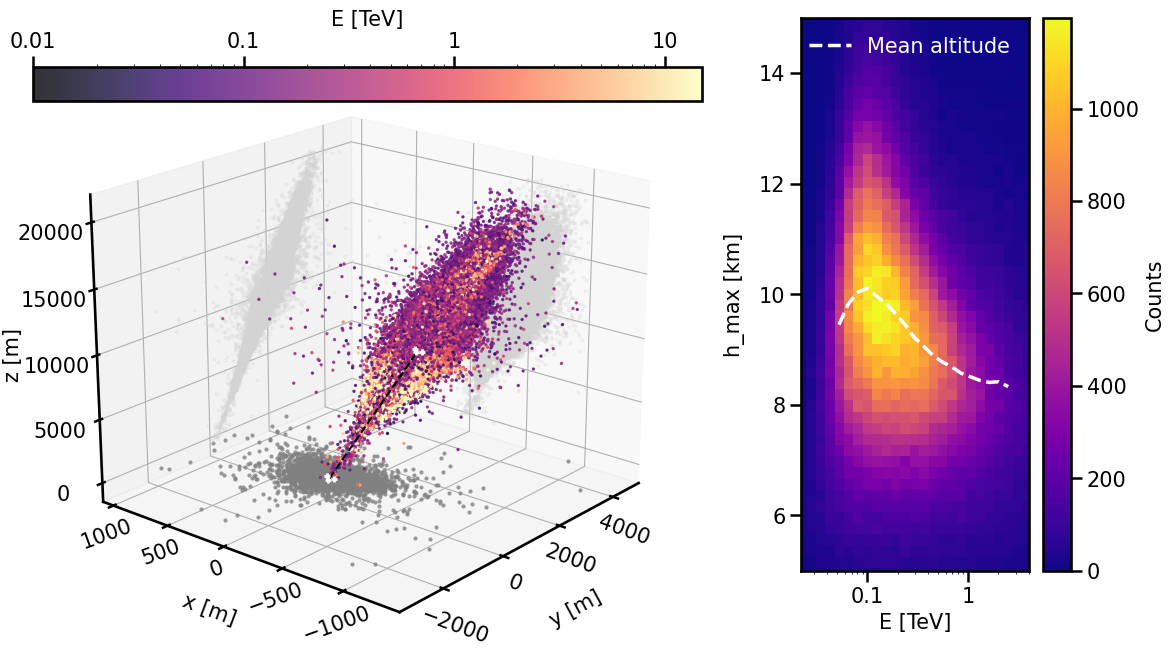

In [21]:
###############################
# PARAMETERS
###############################
c_core_part = 'gray'
alpha_core = 0.4

# sigmas to expand the plot
sigmas_plot = [2, 3, 2.2]

# bins for the histogram
Nbins = [30, 100]
bins_x = np.logspace(-1.7, 1, Nbins[0])
bins_y = np.linspace(0, 20000, Nbins[1])

cmape = 'magma'
cmaph = 'plasma'
###############################

fig = plt.figure(figsize=(12,6.7))
print(f'point_zd={point_zd:.2f}deg, point_az={point_az:.2f}deg')


gs = fig.add_gridspec(2,3)
ax  = fig.add_subplot(gs[:,:2], projection='3d')
ax2 = fig.add_subplot(gs[:, 2])

#####################################
# --- plot the reference points --- #
#####################################
ref_points = [[ref_lower[i], ref_upper[i]] for i in range(len(ref_lower))]
ax.plot(*ref_points,                        ls='--', c='k', marker='',  zorder=30, ms=4, lw=1.5, alpha=1)
ax.plot(xpos, ypos, zpos,                   ls='',   c='w', marker='+', zorder=30, ms=4, lw=2)
ax.plot(xpos_upper, ypos_upper, zpos_upper, ls='',   c='w', marker='+', zorder=30, ms=4, lw=2)
#####################################

##########= ing the limits for the plot --- #
###########################################
# finding the limits for a given sigma
lims = aux.lim_plot(ref_lower, ref_upper, factor=sigmas_plot)
xmin, xmax, ymin, ymax, zmin, zmax = lims

print(f'\nThe plotting limits that will be used in the data:')
print(f'xlims:[{xmin:.1f},{xmax:.1f}], ylims:[{ymin:.1f},{ymax:.1f}], zlims:[{zmin:.1f},{zmax:.1f}]')

# setting the limits in x and y
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
###########################################


###############################
# --- plotting the points --- #
###############################
# computing the needed masks for our limits
print(f'\nMasking the points within the limits...')
core_mask   = aux.mask_3d(core_x,   core_y,   core_z,   lims)
shower_mask = aux.mask_3d(shower_x, shower_y, shower_z, lims)

cores    = core_x[core_mask],     core_y[core_mask],     core_z[core_mask]
showers  = shower_x[shower_mask], shower_y[shower_mask], shower_z[shower_mask]
energies = df['true_energy'].to_numpy()[shower_mask]

# plotting the points
ax.plot(*cores,   'o', color=c_core_part, alpha=.8, ms=1, zorder=-6e10, label='core positions')

order = np.flip(np.argsort(energies))
sc = ax.scatter(showers[0][order], showers[1][order], showers[2][order],
                'o', c=energies[order],  label='h_max positions', norm=colors.LogNorm(vmax=15, vmin=0.01), alpha=0.8, s=2, zorder=energies, cmap=cmape)

cb = fig.colorbar(sc, orientation='horizontal', location='top', label='E [TeV]')

# plotting the projection in the axes
kw = dict(color='lightgray', alpha=0.5, ls='', marker='.', zorder=-20, ms=1)
ax.plot(np.zeros(len(showers[0])) + xmax, showers[1], showers[2], **kw)
ax.plot(showers[0], np.zeros(len(showers[1])) + ymax, showers[2], **kw)
###############################

#####################################
# --- pltting histogram and fit --- #
#####################################
H, xedge, yedge = np.histogram2d(energies, showers[2], bins=(bins_x, bins_y))
x_c = (xedge[1:]+xedge[:-1])/2
y_c = (yedge[1:]+yedge[:-1])/2

X, Y = np.meshgrid(x_c, y_c*1e-3)
cf = ax2.pcolormesh(X, Y, H.T, cmap=cmaph)
fig.colorbar(cf, ax=ax2, label='Counts')

mean_altitude = np.zeros(len(xedge)-1)
for i in range(len(xedge)-1):
    energy_bin_indices = np.where((energies >= xedge[i]) & (energies < xedge[i+1]))[0]
    mean_altitude[i] = np.mean(showers[2][energy_bin_indices])
    
cut_index = int(len(x_c)*0.3)

coeffs = np.polyfit(np.log10(x_c[cut_index:]), mean_altitude[cut_index:], 2)

x_fit = np.linspace(np.log10(x_c).min(), np.log10(x_c).max(), 200)
y_fit = np.polyval(coeffs, x_fit)

# ax2.plot(10**(x_fit), y_fit*1e-3, color='w', ls='--', lw=2, label='Fitted parabola')
# ax2.plot(x_c, mean_altitude*1e-3, '--', color='k', lw=2.5)

a, b = 4, 6
ax2.plot(x_c[a:-b], mean_altitude[a:-b]*1e-3, '--', color='w', lw=2.5, label='Mean altitude')
ax2.legend(frameon=False, fontsize=15, labelcolor='w')

# ax2.axhline(max(mean_altitude)*1e-3, color='w', lw=1.5, ls='--', label='Mean h_max for E$\\approx100GeV$')
# ax2.axhline(mean_altitude[int(len(x_c)*0.8)]*1e-3, color='w', lw=1.5, ls='--', label='Mean h_max for E$\\approx1TeV$')
print(f'Mean h_max for 100GeV {max(mean_altitude)*1e-3:.2f} km')
print(f'Mean h_max for 1TeV   {mean_altitude[int(len(x_c)*0.8)]*1e-3:.2f} km')
# ax2.text(1.3, 10.4, 'E$\\approx100$GeV', fontsize=12, ha='center', va='center', color='w')
# ax2.text(1.7, 8.5, 'E$\\approx1$TeV', fontsize=12, ha='center', va='center', color='w')
#####################################


##################
# --- others --- #
##################
ax.set_xlabel('y [m]')
ax.set_ylabel('x [m]')
ax2.set_ylabel('h_max [km]', labelpad=10)
ax2.set_xlabel('E [TeV]')
ax2.set_xscale('log')
ax2.set_xlim(min(x_c), 4)
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
cb.ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

ax2.set_ylim(5, 15)
# ax2.legend(frameon=False, labelcolor='w', fontsize=12)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('z [m]', rotation=90)
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 0
ax.zaxis.labelpad = 4
ax.tick_params(axis='z', which='major', pad=4)
ax.tick_params(axis='x', rotation=-20, which='major', pad=-2)
ax.tick_params(axis='y', rotation=20, which='major', pad=-4)
fig.tight_layout()
ax.view_init(20, 220)
ax.set_box_aspect(aspect=(3, 3, 2.5), zoom=1.4)
##################


# plt.savefig(f'{pltpath}h_max-and-energy.png', bbox_inches='tight', dpi=dpi)
plt.show()